## UDPipe ##

**Как работает:**

-текст разделяется на предложения, а предложения — на слова

-начинает работу теггер (предсказывает морфологические свойства токена: в каком падеже слово стоит, в каком числе). Работает по последним четырем символам каждого слова, генерирует гипотезы относительно части речи и морфологических тегов этого слова, а затем отбирает лучший вариант

-есть еще лемматизатор, который подбирает для слов начальную форму

-синтаксический парсинг

Разбор по грамматике зависимостей

Чтобы разметить что-то новое, нужно обучить модель на размеченном корпусе. Для русского: Syntagrus и Taiga

In [2]:
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
import ufal.udpipe
from model import Model
import conllu

In [4]:
from collections import defaultdict

In [5]:
model = Model('russian-taiga-ud-2.4-190531.udpipe')

In [6]:
def get_conllu(model, text):
    sentences = model.tokenize(text)
    for s in sentences:
        model.tag(s)
        model.parse(s)
    conllu_text = model.write(sentences, "conllu")
    return conllu_text

In [29]:
tab = get_conllu(model, 'Мне кажется что очень многие растения имеют натуральные, лечебные свойства и много вылечит много болезней так же как и продлить жизнь человеку.')
print(tab)

# newdoc
# newpar
# sent_id = 1
# text = Мне кажется что очень многие растения имеют натуральные, лечебные свойства и много вылечит много болезней так же как и продлить жизнь человеку.
1	Мне	я	PRON	_	Case=Dat|Number=Sing|Person=1	2	iobj	_	_
2	кажется	казаться	VERB	_	Degree=Pos	0	root	_	_
3	что	что	SCONJ	_	Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing	7	mark	_	_
4	очень	очень	NOUN	_	Degree=Pos	7	obl	_	_
5	многие	многий	ADJ	_	Case=Nom|Degree=Pos|Number=Plur	6	amod	_	_
6	растения	растение	NOUN	_	Animacy=Inan|Case=Nom|Gender=Neut|Number=Plur	7	nsubj	_	_
7	имеют	иметь	VERB	_	Aspect=Imp|Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	2	ccomp	_	_
8	натуральные	натуральный	ADJ	_	Case=Nom|Degree=Pos|Number=Plur	11	amod	_	SpaceAfter=No
9	,	,	PUNCT	_	_	11	punct	_	_
10	лечебные	лечебный	ADJ	_	Case=Nom|Degree=Pos|Number=Plur	11	amod	_	_
11	свойства	свойство	NOUN	_	Animacy=Inan|Case=Nom|Gender=Neut|Number=Plur	14	nsubj	_	_
12	и	и	CCONJ	_	_	14	cc	_	_
13	много	много	ADV	NUM	Case=Acc	14

In [30]:
conllu.parse_tree(tab)[0].print_tree()

(deprel:root) form:кажется lemma:казаться upos:VERB [2]
    (deprel:iobj) form:Мне lemma:я upos:PRON [1]
    (deprel:ccomp) form:имеют lemma:иметь upos:VERB [7]
        (deprel:mark) form:что lemma:что upos:SCONJ [3]
        (deprel:obl) form:очень lemma:очень upos:NOUN [4]
        (deprel:nsubj) form:растения lemma:растение upos:NOUN [6]
            (deprel:amod) form:многие lemma:многий upos:ADJ [5]
        (deprel:conj) form:вылечит lemma:вылечить upos:VERB [14]
            (deprel:nsubj) form:свойства lemma:свойство upos:NOUN [11]
                (deprel:amod) form:натуральные lemma:натуральный upos:ADJ [8]
                (deprel:punct) form:, lemma:, upos:PUNCT [9]
                (deprel:amod) form:лечебные lemma:лечебный upos:ADJ [10]
            (deprel:cc) form:и lemma:и upos:CCONJ [12]
            (deprel:advmod) form:много lemma:много upos:ADV [13]
            (deprel:obj) form:болезней lemma:болезень upos:NOUN [16]
                (deprel:nummod:gov) form:много lemma:много

**Визуализация**

Разобранные предложения в формате CONLL (слово на каждой строчке, тэги через табы, предложения отделены двойными отступами)

Использовать функцию, которая приводит к нормальному виду

In [31]:
from nltk.parse import DependencyGraph

In [32]:
def get_dep_tree(text):
    trees = []
    for sent in text.split('\n\n'):
        tree = [line for line in sent.split('\n') if line and line[0] != '#']
        trees.append('\n'.join(tree))
    return trees

In [33]:
to_conll_format = get_dep_tree(tab)

In [34]:
to_conll_format

['1\tМне\tя\tPRON\t_\tCase=Dat|Number=Sing|Person=1\t2\tiobj\t_\t_\n2\tкажется\tказаться\tVERB\t_\tDegree=Pos\t0\troot\t_\t_\n3\tчто\tчто\tSCONJ\t_\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Sing\t7\tmark\t_\t_\n4\tочень\tочень\tNOUN\t_\tDegree=Pos\t7\tobl\t_\t_\n5\tмногие\tмногий\tADJ\t_\tCase=Nom|Degree=Pos|Number=Plur\t6\tamod\t_\t_\n6\tрастения\tрастение\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Plur\t7\tnsubj\t_\t_\n7\tимеют\tиметь\tVERB\t_\tAspect=Imp|Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tccomp\t_\t_\n8\tнатуральные\tнатуральный\tADJ\t_\tCase=Nom|Degree=Pos|Number=Plur\t11\tamod\t_\tSpaceAfter=No\n9\t,\t,\tPUNCT\t_\t_\t11\tpunct\t_\t_\n10\tлечебные\tлечебный\tADJ\t_\tCase=Nom|Degree=Pos|Number=Plur\t11\tamod\t_\t_\n11\tсвойства\tсвойство\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Neut|Number=Plur\t14\tnsubj\t_\t_\n12\tи\tи\tCCONJ\t_\t_\t14\tcc\t_\t_\n13\tмного\tмного\tADV\tNUM\tCase=Acc\t14\tadvmod\t_\t_\n14\tвылечит\tвылечить\tVERB\tVERB\tAspect

In [35]:
graph = DependencyGraph(to_conll_format[0])

Установить корневой узел

In [36]:
graph.root = graph.nodes[0]
list(graph.triples())

[((None, 'TOP'), 'root', ('кажется', 'VERB')),
 (('кажется', 'VERB'), 'iobj', ('Мне', 'PRON')),
 (('кажется', 'VERB'), 'ccomp', ('имеют', 'VERB')),
 (('имеют', 'VERB'), 'mark', ('что', 'SCONJ')),
 (('имеют', 'VERB'), 'obl', ('очень', 'NOUN')),
 (('имеют', 'VERB'), 'nsubj', ('растения', 'NOUN')),
 (('растения', 'NOUN'), 'amod', ('многие', 'ADJ')),
 (('имеют', 'VERB'), 'conj', ('вылечит', 'VERB')),
 (('вылечит', 'VERB'), 'nsubj', ('свойства', 'NOUN')),
 (('свойства', 'NOUN'), 'amod', ('натуральные', 'ADJ')),
 (('свойства', 'NOUN'), 'punct', (',', 'PUNCT')),
 (('свойства', 'NOUN'), 'amod', ('лечебные', 'ADJ')),
 (('вылечит', 'VERB'), 'cc', ('и', 'CCONJ')),
 (('вылечит', 'VERB'), 'advmod', ('много', 'ADV')),
 (('вылечит', 'VERB'), 'obj', ('болезней', 'NOUN')),
 (('болезней', 'NOUN'), 'nummod:gov', ('много', 'NUM')),
 (('кажется', 'VERB'), 'csubj', ('продлить', 'VERB')),
 (('продлить', 'VERB'), 'advmod', ('так', 'ADV')),
 (('так', 'ADV'), 'advmod', ('же', 'PART')),
 (('продлить', 'VERB'), '

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

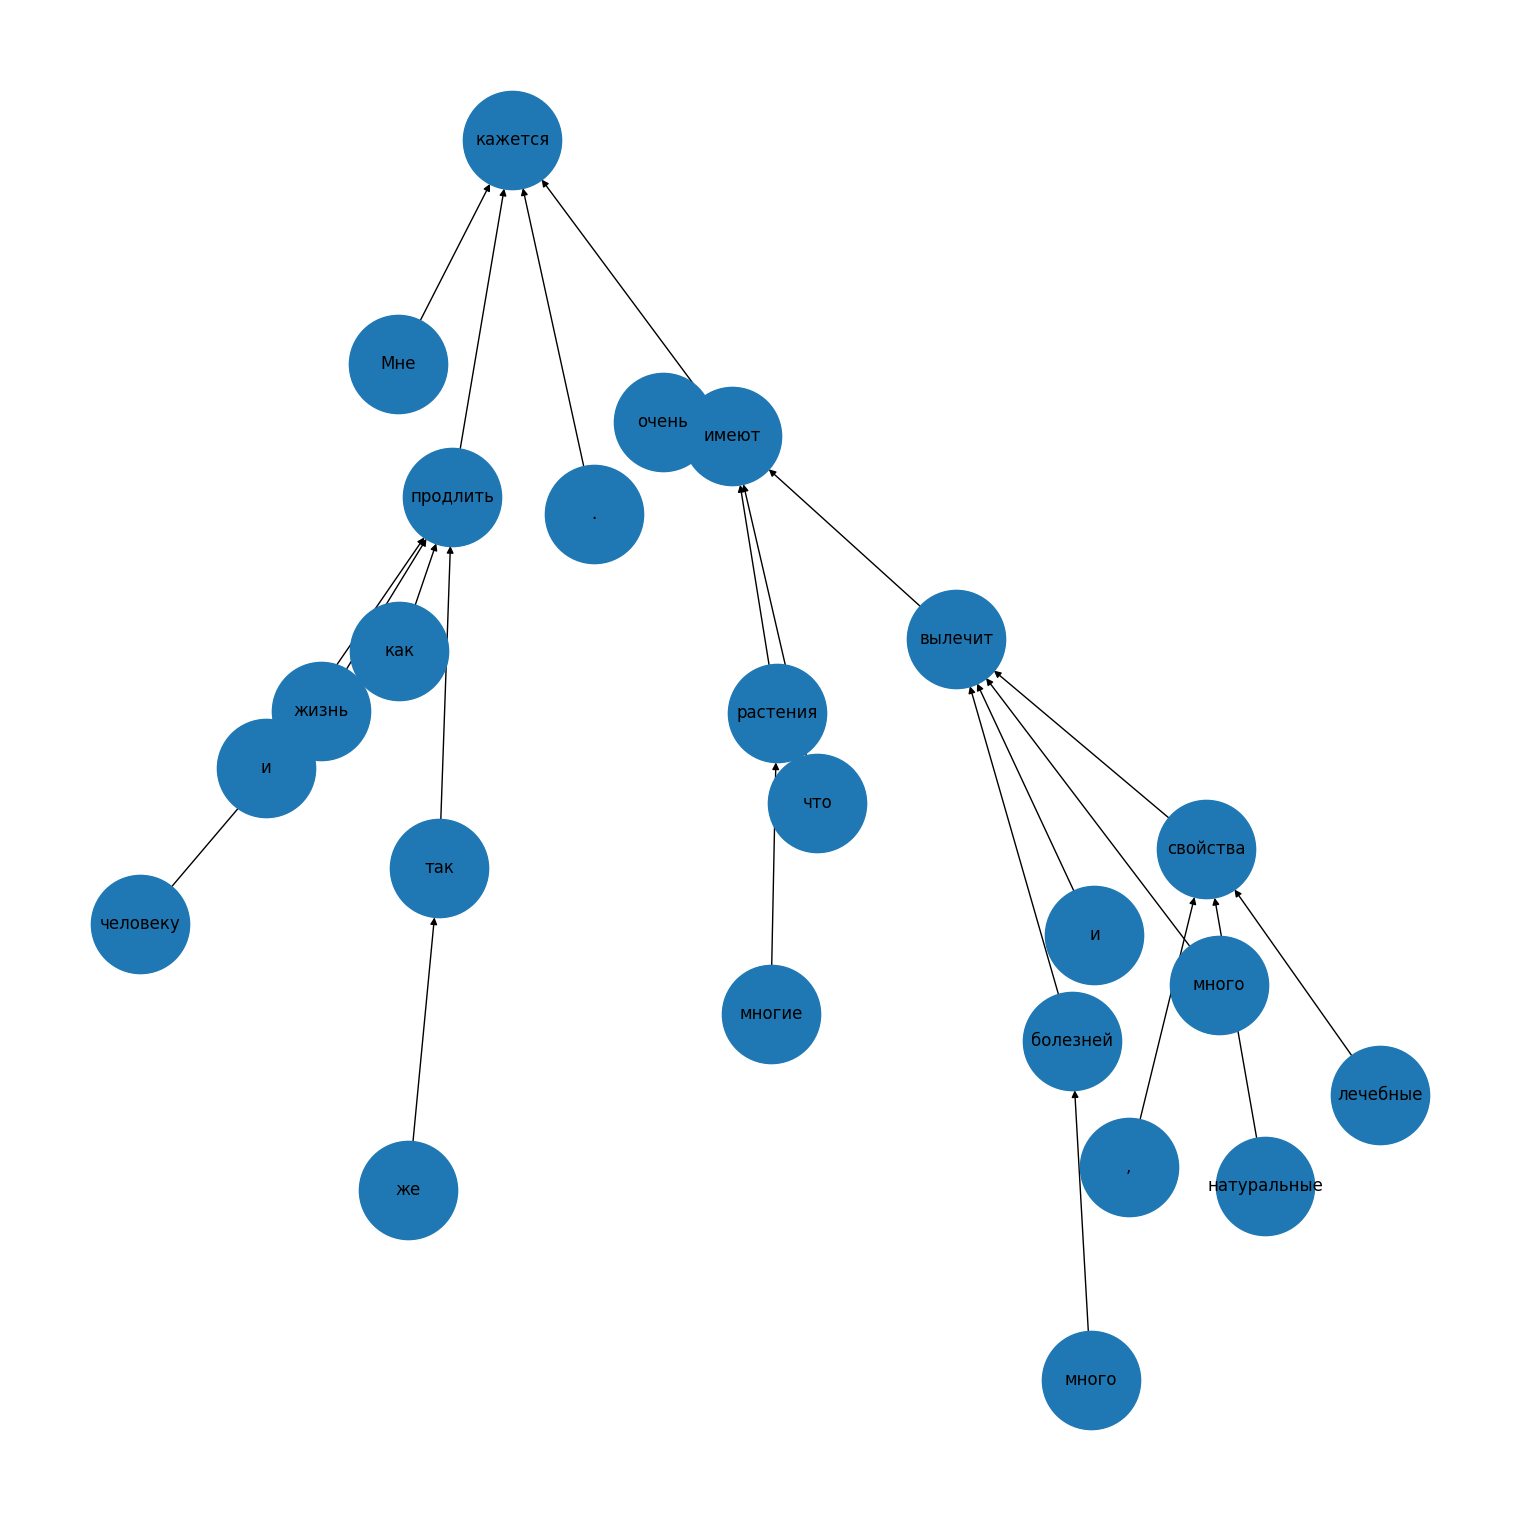

In [42]:
plt.figure(figsize=(15,15))
nx.draw(graph.nx_graph(), labels=graph.nx_labels, node_size=5000)

**Какие функции ещё можно реализовать (если вдруг понадобится):**

-можно доставать составляющие

-можно искать предложения или конструкции, похожие между собой по структуре

## SpaCy ##

**Что есть:**

-частеричная разметка

-лемматизация, токенизация, морфологический анализ

-дерево зависимостей

In [43]:
import spacy

nlp = spacy.load("ru_core_news_sm")

In [44]:
predl = nlp("Мне кажется что очень многие растения имеют натуральные, лечебные свойства и много вылечит много болезней так же как и продлить жизнь человеку.")

In [45]:
for token in predl:
    print(token.text, token.lemma_, token.pos_, token.dep_)

Мне мне PRON iobj
кажется казаться VERB ROOT
что что SCONJ mark
очень очень ADV advmod
многие многие ADJ amod
растения растение NOUN nsubj
имеют иметь VERB ccomp
натуральные натуральный ADJ amod
, , PUNCT punct
лечебные лечебный ADJ conj
свойства свойство NOUN obj
и и CCONJ cc
много много ADV advmod
вылечит вылечить VERB conj
много много NUM nummod:gov
болезней болезнь NOUN obj
так так ADV advmod
же же PART fixed
как как SCONJ fixed
и и PART advmod
продлить продлить VERB xcomp
жизнь жизнь NOUN obj
человеку человек NOUN iobj
. . PUNCT punct


In [46]:
for token in predl:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Мне iobj кажется VERB []
кажется ROOT кажется VERB [Мне, имеют, .]
что mark имеют VERB []
очень advmod многие ADJ []
многие amod растения NOUN [очень]
растения nsubj имеют VERB [многие]
имеют ccomp кажется VERB [что, растения, свойства, вылечит]
натуральные amod свойства NOUN [лечебные]
, punct лечебные ADJ []
лечебные conj натуральные ADJ [,]
свойства obj имеют VERB [натуральные]
и cc вылечит VERB []
много advmod вылечит VERB []
вылечит conj имеют VERB [и, много, болезней, продлить]
много nummod:gov болезней NOUN []
болезней obj вылечит VERB [много]
так advmod продлить VERB [же, как]
же fixed так ADV []
как fixed так ADV []
и advmod продлить VERB []
продлить xcomp вылечит VERB [так, и, жизнь, человеку]
жизнь obj продлить VERB []
человеку iobj продлить VERB []
. punct кажется VERB []


In [47]:
from spacy import displacy

In [48]:
displacy.render(predl, style='dep')

In [1]:
text = 'И собака туда пошла за него.'

In [9]:
tab_2 = get_conllu(model, text)

In [11]:
conllu.parse_tree(tab_2)[0].print_tree()

(deprel:root) form:пошла lemma:пойти upos:VERB [4]
    (deprel:cc) form:И lemma:и upos:CCONJ [1]
    (deprel:nsubj) form:собака lemma:собако upos:NOUN [2]
    (deprel:advmod) form:туда lemma:туда upos:ADV [3]
    (deprel:obl) form:него lemma:он upos:PRON [6]
        (deprel:case) form:за lemma:за upos:ADP [5]
    (deprel:punct) form:. lemma:. upos:PUNCT [7]


In [18]:
to_conll_format_2 = get_dep_tree(tab_2)

In [19]:
graph_2 = DependencyGraph(to_conll_format_2[0])

In [20]:
graph_2.root = graph_2.nodes[0]
list(graph_2.triples())

[((None, 'TOP'), 'root', ('пошла', 'VERB')),
 (('пошла', 'VERB'), 'cc', ('И', 'CCONJ')),
 (('пошла', 'VERB'), 'nsubj', ('собака', 'NOUN')),
 (('пошла', 'VERB'), 'advmod', ('туда', 'ADV')),
 (('пошла', 'VERB'), 'obl', ('него', 'PRON')),
 (('него', 'PRON'), 'case', ('за', 'ADP')),
 (('пошла', 'VERB'), 'punct', ('.', 'PUNCT'))]

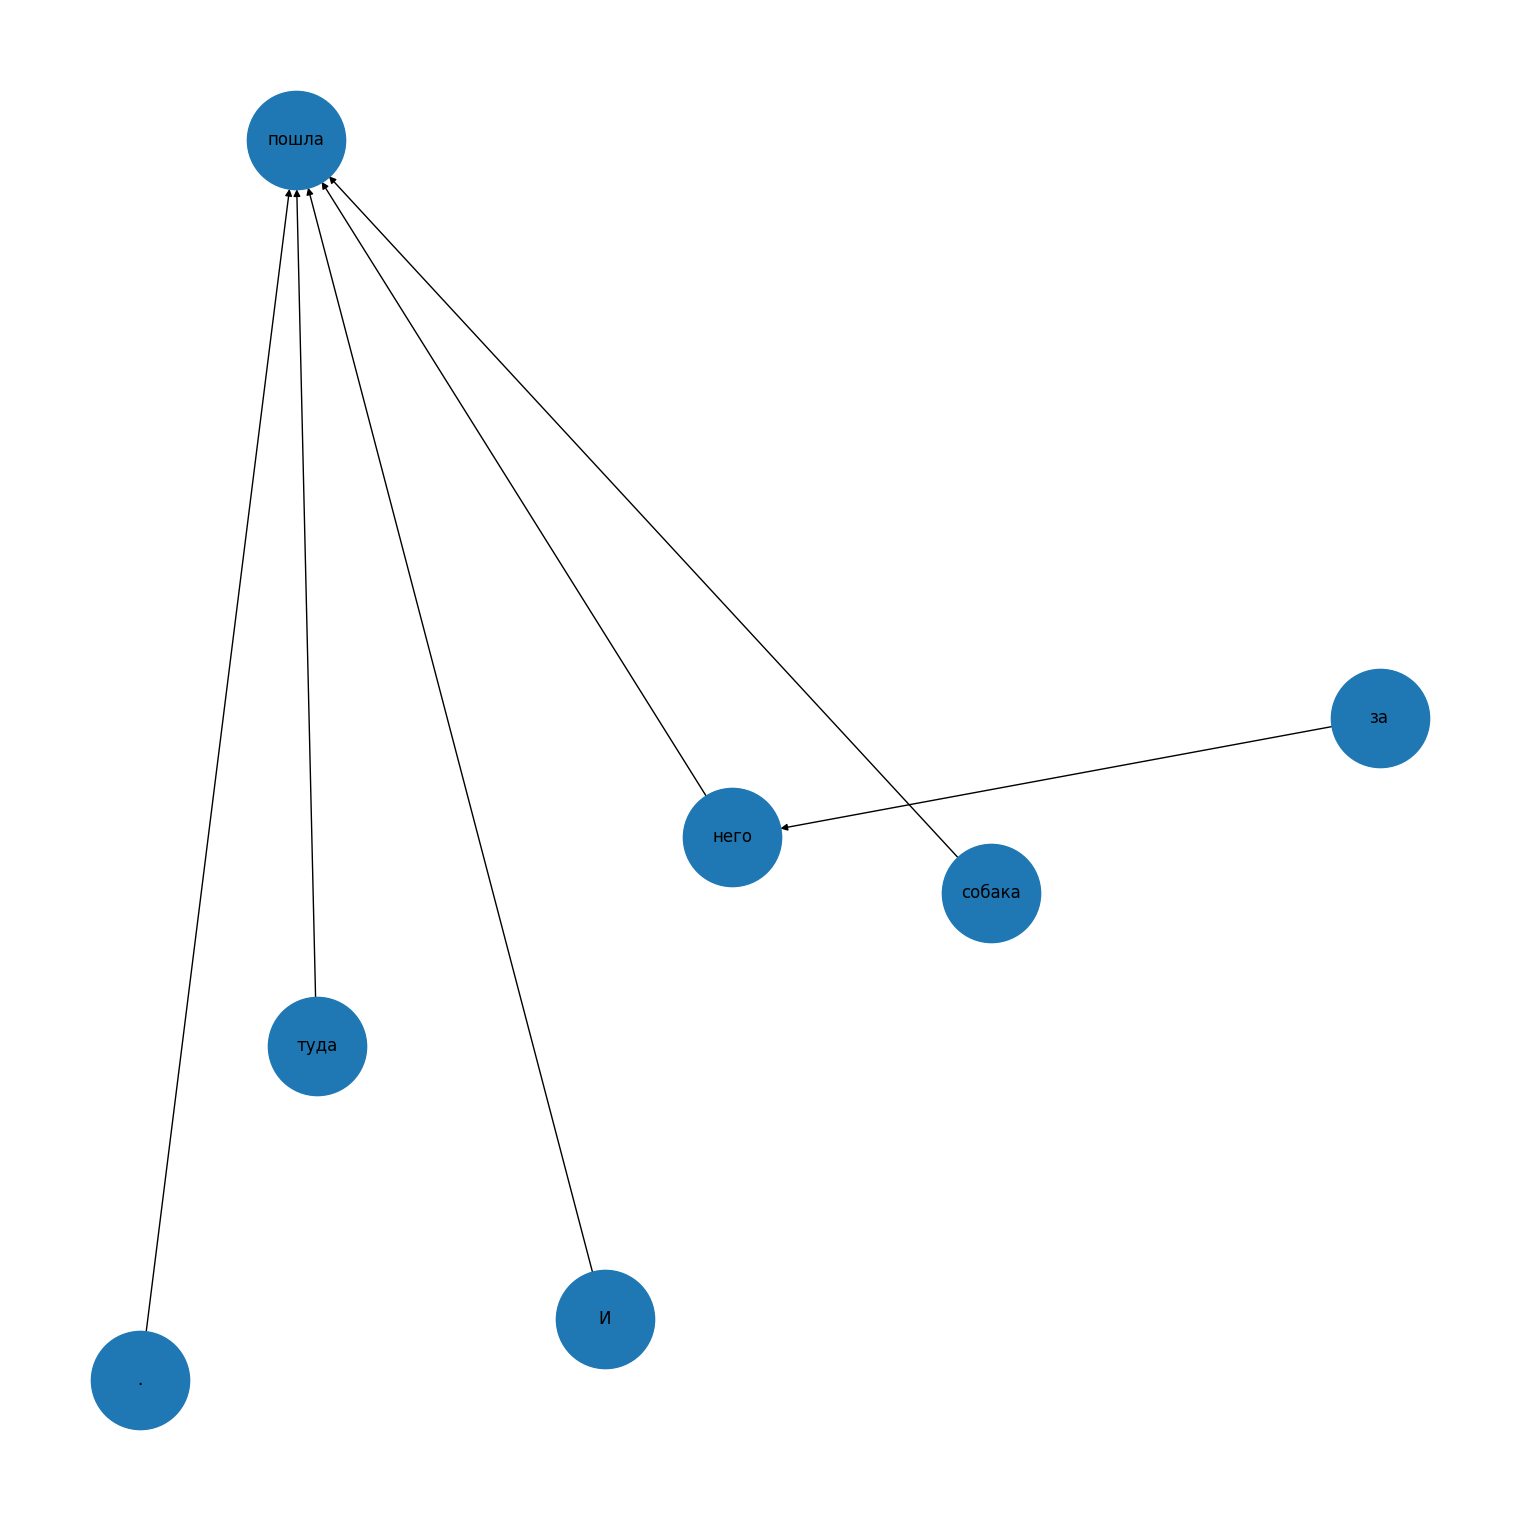

In [49]:
plt.figure(figsize=(15,15))
nx.draw(graph_2.nx_graph(), labels=graph_2.nx_labels, node_size=5000)

In [50]:
predl_2 = nlp(text)

In [52]:
displacy.render(predl_2, style='dep')